# Compare all the tree-guided MTL models on the iPCs data produced by Kathrin

In the following I load every individual RData pbject that the TGGLasso script generated. And then assign separate names to the loaded variables, reflecting which setup they correspond to. Then, by having these, I compute the correlation (pearson and spearman) between the measured and predicted values of single-cell gene expression.

If you don't wanna bother about the deatiled coding, you can simply scroll down to the very end, where the plot for this comparison is created as well as the conclusion points.

## Load the trained model

In [1]:
load("../../scMTL_StemNet_imputed_atacHLCR2_TGGLasso.RData")
print(ls())

[1] "best.lambda" "lambdas"     "mst"         "partition"   "pred.acc"   
[6] "TGL.model"  


In [2]:
HLCR2_model <- TGL.model
HLCR2_partition <- partition

## Load the trained model

In [3]:
load("../../scMTL_StemNet_imputed_atacHLCR3_TGGLasso.RData")
print(ls())

[1] "best.lambda"     "HLCR2_model"     "HLCR2_partition" "lambdas"        
[5] "mst"             "partition"       "pred.acc"        "TGL.model"      


In [4]:
HLCR3_model <- TGL.model
HLCR3_partition <- partition

## Load the trained model

In [5]:
load("../../scMTL_StemNet_imputed_atacHLCR4_TGGLasso.RData")
print(ls())

 [1] "best.lambda"     "HLCR2_model"     "HLCR2_partition" "HLCR3_model"    
 [5] "HLCR3_partition" "lambdas"         "mst"             "partition"      
 [9] "pred.acc"        "TGL.model"      


In [6]:
HLCR4_model <- TGL.model
HLCR4_partition <- partition

## Load the trained model

In [7]:
load("../../scMTL_StemNet_imputed_atacPHHD1_TGGLasso.RData")
print(ls())

 [1] "best.lambda"     "HLCR2_model"     "HLCR2_partition" "HLCR3_model"    
 [5] "HLCR3_partition" "HLCR4_model"     "HLCR4_partition" "lambdas"        
 [9] "mst"             "partition"       "pred.acc"        "TGL.model"      


In [8]:
PHHD1_model <- TGL.model
PHHD1_partition <- partition

## Load the trained model

In [9]:
load("../../scMTL_StemNet_imputed_atacPHHD2_TGGLasso.RData")
print(ls())

 [1] "best.lambda"     "HLCR2_model"     "HLCR2_partition" "HLCR3_model"    
 [5] "HLCR3_partition" "HLCR4_model"     "HLCR4_partition" "lambdas"        
 [9] "mst"             "partition"       "PHHD1_model"     "PHHD1_partition"
[13] "pred.acc"        "TGL.model"      


In [10]:
PHHD2_model <- TGL.model
PHHD2_partition <- partition

## Load the trained model

In [11]:
load("../../scMTL_StemNet_imputed_atacPHHD3_TGGLasso.RData")
print(ls())

 [1] "best.lambda"     "HLCR2_model"     "HLCR2_partition" "HLCR3_model"    
 [5] "HLCR3_partition" "HLCR4_model"     "HLCR4_partition" "lambdas"        
 [9] "mst"             "partition"       "PHHD1_model"     "PHHD1_partition"
[13] "PHHD2_model"     "PHHD2_partition" "pred.acc"        "TGL.model"      


In [12]:
PHHD3_model <- TGL.model
PHHD3_partition <- partition

## Normalize the partitioned data
The stored partitioned data in the above RData object is log-transformed. but not normalized. In order to proceed with the downstream analysis, it's easier to normalize them in the same way they were done before model fitting.

In [13]:
preprocess_partition <- function(partition){
    x.train <- scale(partition$train$x)
    y.train <- scale(partition$train$y)


    x.test <- scale(partition$test$x, center= colMeans(partition$train$x),
                    scale= apply(partition$train$x, 2, FUN= sd))
    y.test <- scale(partition$test$y, center= colMeans(partition$train$y),
                    scale= apply(partition$train$y, 2, FUN= sd))
    return(list(x.train= x.train, y.train= y.train, x.test= x.test, y.test= y.test))
}

In [14]:
HLCR3_partition <- preprocess_partition(HLCR3_partition)
HLCR2_partition <- preprocess_partition(HLCR2_partition)
HLCR4_partition <- preprocess_partition(HLCR4_partition)
PHHD2_partition <- preprocess_partition(PHHD2_partition)
PHHD3_partition <- preprocess_partition(PHHD3_partition)
PHHD1_partition <- preprocess_partition(PHHD1_partition)

## Train and test dimenstion

In [15]:
print("dynamic")
print(paste("train: ", paste(dim(PHHD3_partition$x.train), collapse = "x")))
print(paste("test", paste(dim(PHHD3_partition$x.test), collapse = "x")))

print("epigenetic")
print(paste("train: ", paste(dim(PHHD3_partition$x.train), collapse = "x")))
print(paste("test", paste(dim(PHHD3_partition$x.test), collapse = "x")))

[1] "dynamic"
[1] "train:  1518x728"
[1] "test 1012x728"
[1] "epigenetic"
[1] "train:  1518x728"
[1] "test 1012x728"



## Cell names

In [16]:
head(colnames(PHHD3_partition$y.train))

[1] "HLC_CEL_c11_R1" "HLC_CEL_c17_R1" "HLC_CEL_c25_R1" "HLC_CEL_c35_R1"
[5] "HLC_CEL_c41_R1" "HLC_CEL_c42_R1"

## Compute the predictions on training and test data

In [17]:
get_preds <- function(partition, TGL.model){
    pred.train <- cbind(1, partition$x.train) %*% rbind(TGL.model$intercept, TGL.model$B)
    pred.test <- cbind(1, partition$x.test) %*% rbind(TGL.model$intercept, TGL.model$B)
    return(list(pred.train= pred.train, pred.test= pred.test))
}

In [18]:
HLCR3_preds <- get_preds(HLCR3_partition, HLCR3_model)
HLCR2_preds <- get_preds(HLCR2_partition, HLCR2_model)

HLCR4_preds <- get_preds(HLCR4_partition, HLCR4_model)
PHHD2_preds <- get_preds(PHHD2_partition, PHHD2_model)

PHHD3_preds <- get_preds(PHHD3_partition, PHHD3_model)
PHHD1_preds <- get_preds(PHHD1_partition, PHHD1_model)

### Plot the scatter plots for some random cells (training data)

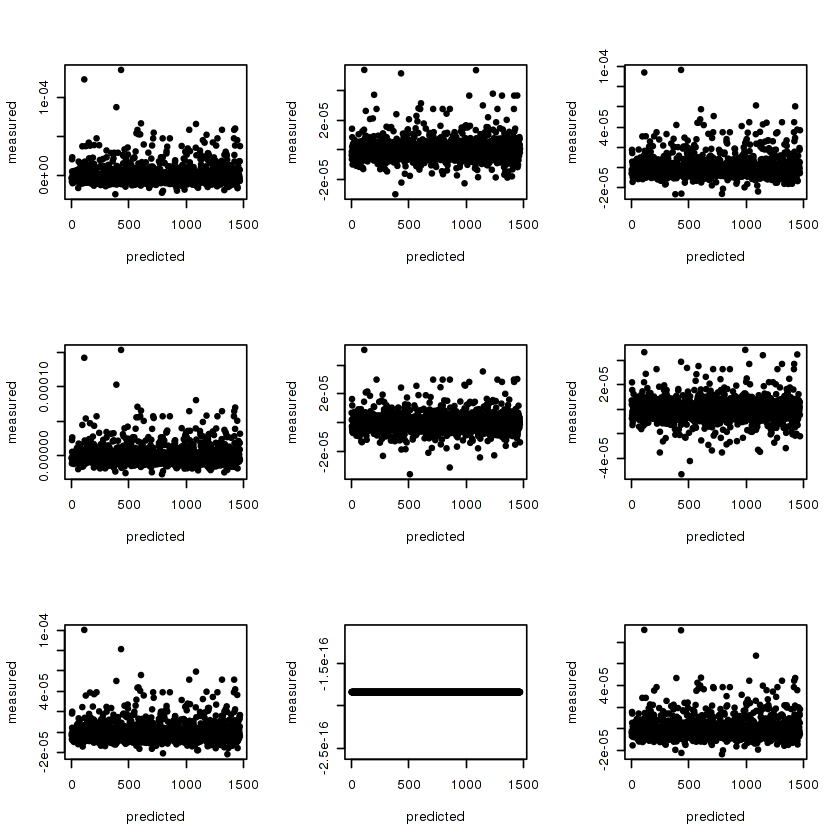

In [19]:
n <- 9
par(mfrow = c(sqrt(n), sqrt(n)))

random.idx <- sample(ncol(HLCR3_preds$pred.train))[seq(n)]
for(i in seq(n))
    plot(HLCR3_preds$pred.train[, random.idx[i]], HLCR3_preds$y.train[, random.idx[i]], pch= 20, xlab= "predicted", ylab= "measured")

### Plot the scatter plots for some random cells (test data)

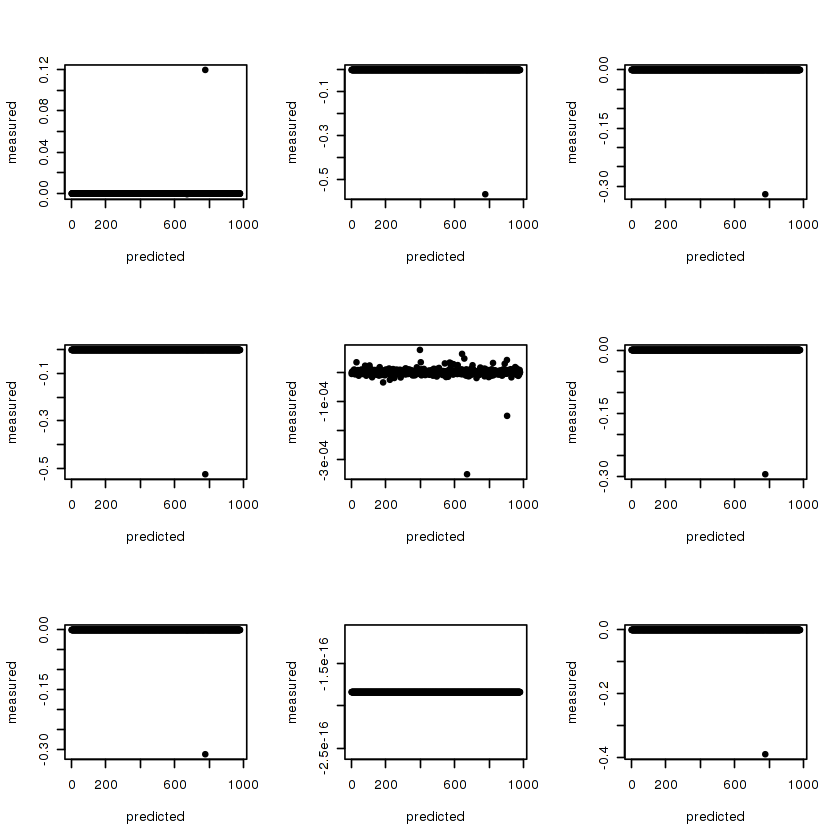

In [20]:
par(mfrow = c(sqrt(n), sqrt(n)))

#random.idx <- sample(ncol(pred.test))[seq(n)]
for(i in seq(n))
    plot(HLCR3_preds$pred.test[, random.idx[i]], HLCR3_preds$y.test[, random.idx[i]], pch= 20, xlab= "predicted", ylab= "measured")

The scatter plots above, already, are indicative of a poor generalization on the test data...

## Compute the correlations between predicted and actual measurements of gene expression

In [21]:
options(warn= -1)
get_pred_cors <- function(preds, partition){
    # Train
    ## Method= Pearson
    cors.train.p <- sapply(seq(ncol(preds$pred.train)), function(i)
        cor(preds$pred.train[, i], partition$y.train[, i], method= "pearson"))

    ## Method= Spearman
    cors.train.s <- sapply(seq(ncol(preds$pred.train)), function(i)
        cor(preds$pred.train[, i], partition$y.train[, i], method= "spearman"))

    # Test
    ## Method= Pearson
    cors.test.p <- sapply(seq(ncol(preds$pred.test)), function(i)
        cor(preds$pred.test[, i], partition$y.test[, i], method= "pearson"))

    ## Method= Spearman
    cors.test.s <- sapply(seq(ncol(preds$pred.test)), function(i)
        cor(preds$pred.test[, i], partition$y.test[, i], method= "spearman"))
                          
    return(list(cors.train.p= cors.train.p, cors.train.s= cors.train.s, cors.test.p= cors.test.p, cors.test.s= cors.test.s))
}

In [22]:
HLCR2_cors <- get_pred_cors(HLCR2_preds, HLCR2_partition)
HLCR3_cors <- get_pred_cors(HLCR3_preds, HLCR3_partition)
HLCR4_cors <- get_pred_cors(HLCR4_preds, HLCR4_partition)

PHHD1_cors <- get_pred_cors(PHHD1_preds, PHHD1_partition)
PHHD2_cors <- get_pred_cors(PHHD2_preds, PHHD2_partition)
PHHD3_cors <- get_pred_cors(PHHD3_preds, PHHD3_partition)

In [23]:
get_cor_df <- function(cors, feature_type, imputed){
    df <- data.frame(val= cors$cors.test.p, feature= feature_type, imputation_status= imputed,
                     cor_method= "Pearson", data_partition= "test")
    df <- rbind(df, data.frame(val= cors$cors.test.s, feature= feature_type, imputation_status= imputed,
                     cor_method= "Spearman", data_partition= "test"))
    df <- rbind(df, data.frame(val= cors$cors.train.p, feature= feature_type, imputation_status= imputed,
                     cor_method= "Pearson", data_partition= "train"))
    df <- rbind(df, data.frame(val= cors$cors.train.s, feature= feature_type, imputation_status= imputed,
                     cor_method= "Spearman", data_partition= "train"))
    return(df)
}

In [24]:
HLCR2_df <- get_cor_df(HLCR2_cors, "HLCR2", "imputed")
HLCR3_df <- get_cor_df(HLCR3_cors, "HLCR3", "imputed")
HLCR4_df <- get_cor_df(HLCR4_cors, "HLCR4", "imputed")

PHHD1_df <- get_cor_df(PHHD1_cors, "PHHD1", "imputed")
PHHD2_df <- get_cor_df(PHHD2_cors, "PHHD2", "imputed")
PHHD3_df <- get_cor_df(PHHD3_cors, "PHHD3", "imputed")

## bind all dataframes together
df <- rbind(HLCR2_df, HLCR3_df, HLCR4_df, PHHD1_df, PHHD2_df, PHHD3_df)
head(df)

val,feature,imputation_status,cor_method,data_partition
0.03994590,HLCR2,imputed,Pearson,test
0.02433480,HLCR2,imputed,Pearson,test
0.02595831,HLCR2,imputed,Pearson,test
0.04405080,HLCR2,imputed,Pearson,test
0.10306954,HLCR2,imputed,Pearson,test
0.05533431,HLCR2,imputed,Pearson,test


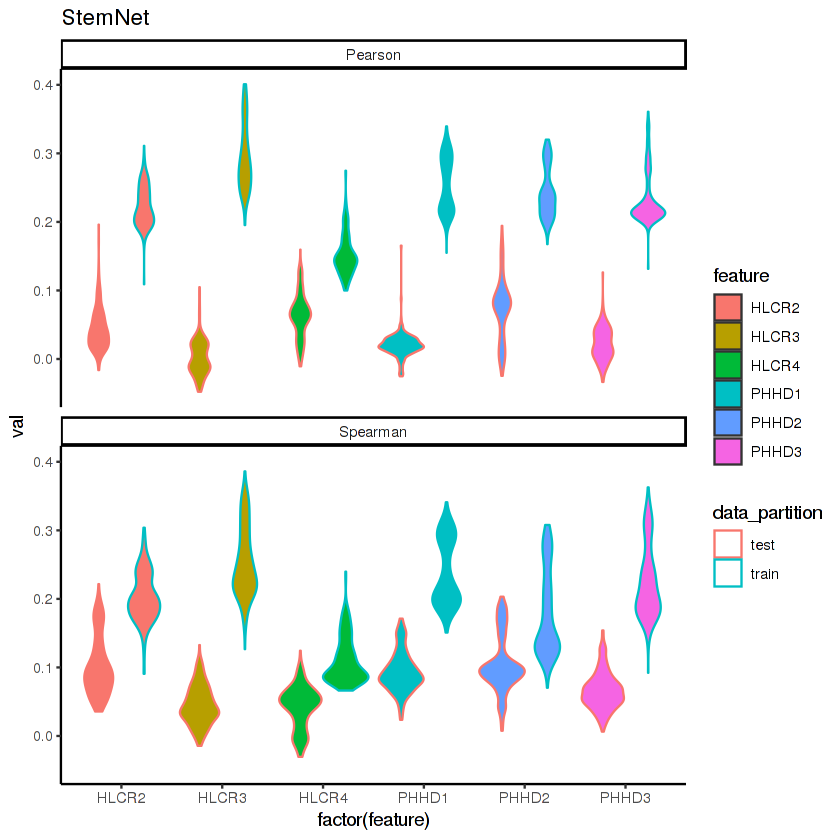

In [30]:
library(ggplot2)
ggplot(df, aes(factor(feature), val)) + 
geom_violin(aes(fill= feature, colour= data_partition)) + 
ggtitle("StemNet") + facet_wrap("cor_method", ncol= 1) + 
theme_classic()
